In [1]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('C:\\Users\\bomul\\OneDrive\\바탕 화면\\23-1\\데사\\중간 대비\\6주차 연습\\auto-mpg.csv')

In [2]:
print('데이터셋 크기: ', data_df.shape)
data_df.head()

데이터셋 크기:  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis = 1, inplace = False)
print('데이터셋 크기: ', data_df.shape)
data_df.head()

데이터셋 크기:  (398, 6)


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [5]:
from sklearn.linear_model import LinearRegression #선형 회귀 분석
from sklearn.model_selection import train_test_split # 데이터셋 분리 작업
from sklearn.metrics import mean_squared_error, r2_score #MSE(mean squared error), R-square (모형 성능 확인)


In [6]:
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis = 1, inplace = False )

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(278, 5) (120, 5) (278,) (120,)


In [8]:
# 훈련용 데이터를 통한 예측 모형 구축

lr = LinearRegression()

In [9]:
lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
# 테스트용 데이터의 X값을 통해 예측된 Y값 생성
# 절편값

intercept = np.round(lr.intercept_, 2)
intercept

-17.55

In [11]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef

cylinders      -0.14
displacement    0.01
weight         -0.01
acceleration    0.20
model_year      0.76
dtype: float64

In [12]:
Y_predict = lr.predict(X_test)

In [13]:
#랜덤하게 추출

pd.DataFrame(Y_test)

,mpg
65,14.0
132,25.0
74,13.0
78,21.0
37,18.0
...,...
236,25.5
352,29.9
92,13.0
221,17.5


In [14]:
pd.DataFrame(Y_predict)

,0
0,12.688139
1,24.892357
2,11.779662
3,20.713484
4,17.599750
...,...
115,25.461468
116,31.730876
117,11.834782
118,17.748251


In [15]:
pd.DataFrame(Y_test - Y_predict)

,mpg
65,1.311861
132,0.107643
74,1.220338
78,0.286516
37,0.400250
...,...
236,0.038532
352,-1.830876
92,1.165218
221,-0.248251


In [16]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R-square : {0:.3f}'.format(r_square))

MSE : 12.278, RMSE : 3.504
R-square : 0.808


In [17]:
#mpg와 나머지 5개 변수간 관계에 대한 산점도와 선형 회귀 그래프(시각화)

import matplotlib.pyplot as plt
import seaborn as sns

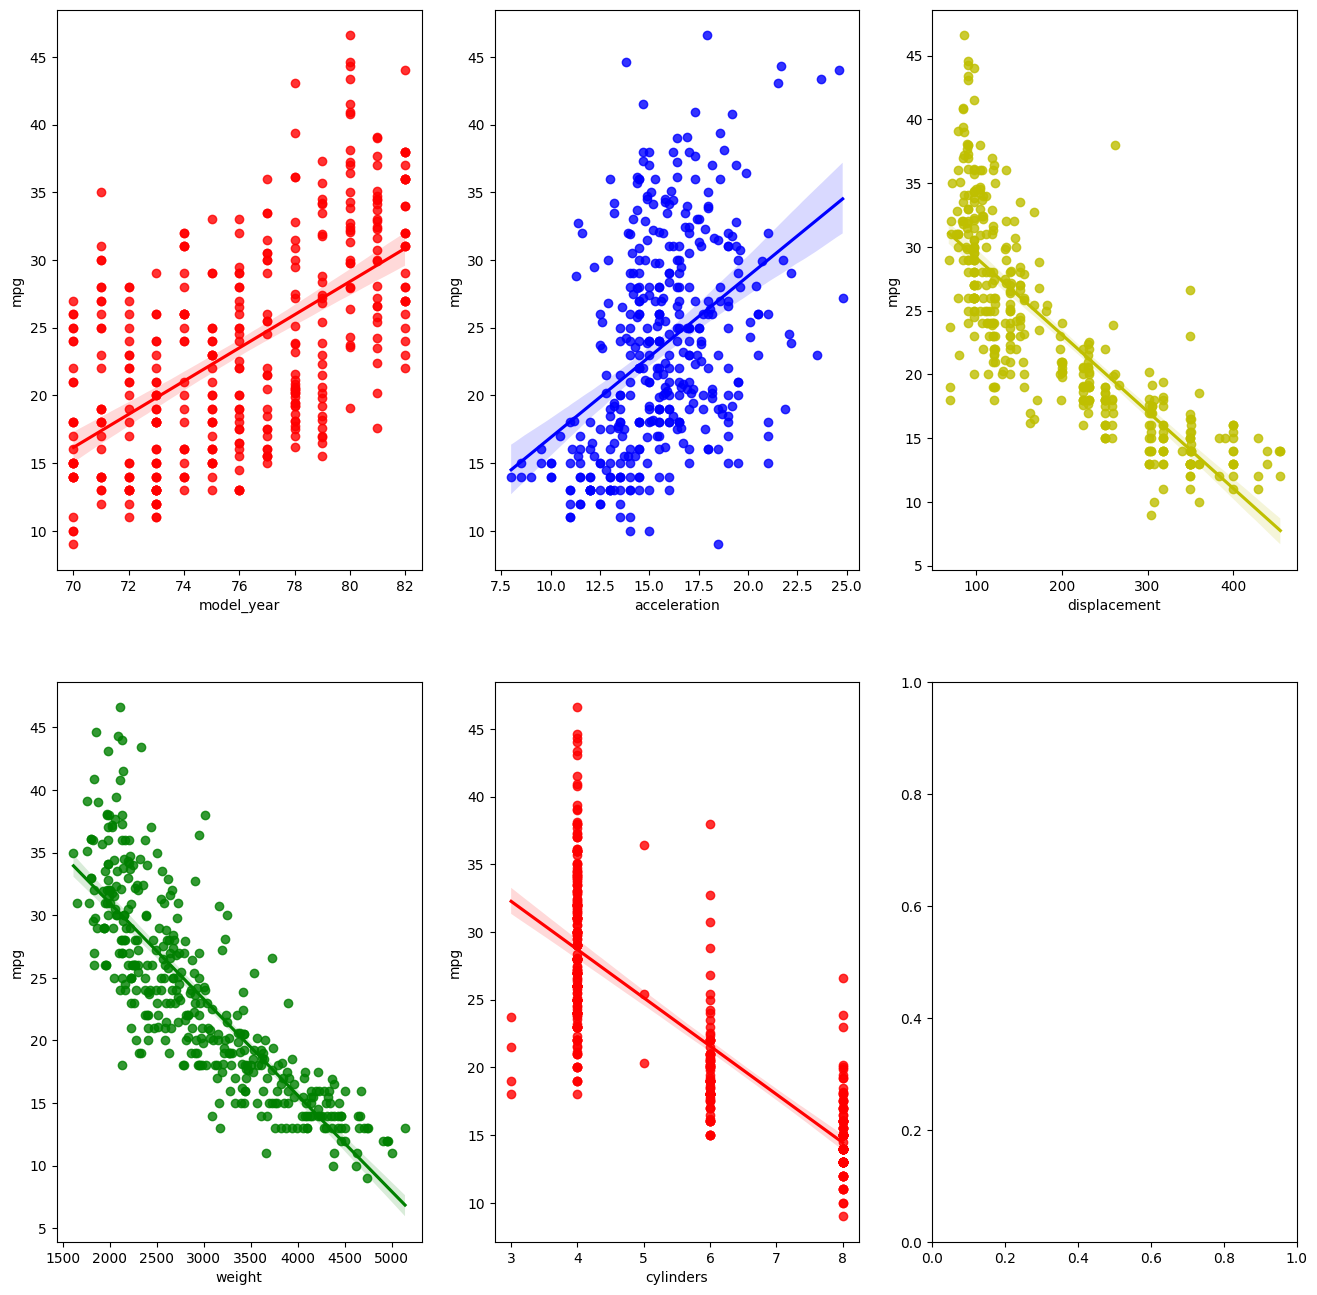

In [18]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = data_df, ax = axs[row][col], color = plot_color[i])

In [20]:
#임의의 데이터에 대한 연비 예측

print('차의 정보를 입력해주세요.')

cylinders_new = int(input('cylinders : ')) # 8
displacement_new = int(input('displacement : ')) # 350
weight_new = int(input('weight : ')) # 3200
acceleration_new = int(input('acceleration : ')) # 22
model_year_new = int(input('model year : ')) # 99

차의 정보를 입력해주세요.


In [22]:
mpg_predict = lr.predict([[cylinders_new, displacement_new, weight_new, acceleration_new, model_year_new]])

c:\Users\bomul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
print('입력된 차종의 예상 연비는 %.2f입니다.' % mpg_predict)

입력된 차종의 예상 연비는 41.32입니다.
